In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('data/game_logs_total.csv')
df.set_index('Date' ,inplace=True)
lebron = df[df['Player'] == 'LeBron James']
lebron.head()

,Player,Team,Match-up,W/L,Min,Pts,FGM,FGA,3PM,3PA,...,REB,AST,STL,BLK,TOV,PF,+/-,dubdub,tripdub,DraftKings
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-28,LeBron James,CLE,@TOR,W,39,21,7,16,2,6,...,8,7,0,0,5,2,0,0,0,40.00
2016-10-29,LeBron James,CLE,vs.ORL,W,39,23,7,16,2,6,...,6,9,1,1,2,2,1,0,0,48.00
2016-11-01,LeBron James,CLE,vs.HOU,W,36,19,6,12,1,3,...,13,8,0,0,4,4,15,1,0,47.25
2016-11-03,LeBron James,CLE,vs.BOS,W,36,30,12,22,1,4,...,7,12,1,0,2,2,18,1,0,59.75
2016-11-05,LeBron James,CLE,@PHI,W,36,25,9,23,1,5,...,8,14,2,1,5,1,11,1,0,61.50


In [44]:
# Code written by Joseph Nelson.
# Improved by Hovanes Gasparian

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [45]:
interpret_dftest(adfuller(lebron['DraftKings']))

Test Statistic   -1.671379e+01
p-value           1.427305e-29
Lag Used          0.000000e+00
dtype: float64

In [46]:
# lebron = lebron[['DraftKings']]
lebron = lebron[['DraftKings']].diff(1)

In [47]:
y_train, y_test = train_test_split(lebron,
                                   test_size = 0.1,
                                   shuffle = False)

In [48]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p},1,{q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
                          order = (p,1,q)) # values of p, d, q
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0,1,0)
The AIC for ARIMA(0,1,0) is: 2395.360999857371
Attempting to fit ARIMA(0,1,1)
The AIC for ARIMA(0,1,1) is: 2127.1122506565953
Attempting to fit ARIMA(0,1,2)
The AIC for ARIMA(0,1,2) is: 1965.8839457871643
Attempting to fit ARIMA(0,1,3)
The AIC for ARIMA(0,1,3) is: 1967.7310245346755
Attempting to fit ARIMA(0,1,4)
Attempting to fit ARIMA(1,1,0)
The AIC for ARIMA(1,1,0) is: 2231.263687230631
Attempting to fit ARIMA(1,1,1)
Attempting to fit ARIMA(1,1,2)
Attempting to fit ARIMA(1,1,3)
Attempting to fit ARIMA(1,1,4)
Attempting to fit ARIMA(2,1,0)
The AIC for ARIMA(2,1,0) is: 2187.469143616312
Attempting to fit ARIMA(2,1,1)
Attempting to fit ARIMA(2,1,2)
Attempting to fit ARIMA(2,1,3)
Attempting to fit ARIMA(2,1,4)
The AIC for ARIMA(2,1,4) is: 1963.484933075063
Attempting to fit ARIMA(3,1,0)
The AIC for ARIMA(3,1,0) is: 2115.5131215036163
Attempting to fit ARIMA(3,1,1)
Attempting to fit ARIMA(3,1,2)
Attempting to fit ARIMA(3,1,3)
Attempting to fit ARIMA(3,1,4)


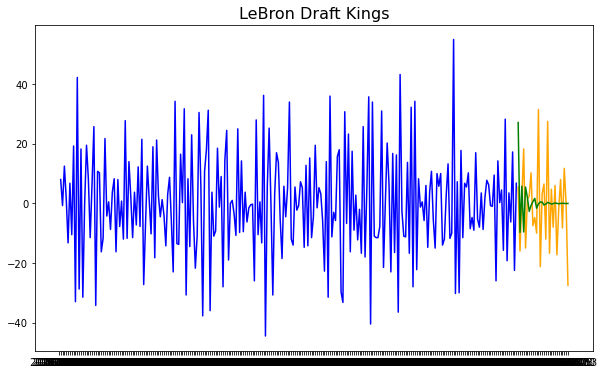

In [51]:
model = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
              order = (4,1,0))

arima = model.fit()

# Generate predictions based on test set.
preds = model.predict(params=arima.params,
                      start = 247,
                      end = 274)

# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')

plt.title(label = 'LeBron Draft Kings', fontsize=16)
plt.show();

Questions:
    
1. How to do this for all players in the dataframe?
2. How to incorporate the rest days and defense statistics?
3. How to update it daily and live? 